In [ ]:
!unzip data.zip
!rm data.zip

Archive:  data.zip
   creating: data/Areas Urbanas/
  inflating: data/Areas Urbanas/areas_urbanas.dbf  
  inflating: data/Areas Urbanas/areas_urbanas.prj  
  inflating: data/Areas Urbanas/areas_urbanas.sbn  
  inflating: data/Areas Urbanas/areas_urbanas.sbx  
  inflating: data/Areas Urbanas/areas_urbanas.shp  
  inflating: data/Areas Urbanas/areas_urbanas.shp.xml  
  inflating: data/Areas Urbanas/areas_urbanas.shx  
  inflating: data/Areas Urbanas/Disclaimer.txt  
   creating: data/Distritos Censales/
  inflating: data/Distritos Censales/centroides Distritos Censales RM.dbf  
  inflating: data/Distritos Censales/centroides Distritos Censales RM.prj  
  inflating: data/Distritos Censales/centroides Distritos Censales RM.qpj  
  inflating: data/Distritos Censales/centroides Distritos Censales RM.shp  
  inflating: data/Distritos Censales/centroides Distritos Censales RM.shx  
  inflating: data/Distritos Censales/Distritos Censales RM.dbf  
  inflating: data/Distritos Censales/Distritos C

In [ ]:
import geopandas as gpd

In [ ]:
areas_urbanas = gpd.read_file('data/Areas Urbanas/areas_urbanas.shp')
distritos = gpd.read_file('data/Distritos Censales/Distritos Censales RM.shp')
estaciones = gpd.read_file('data/Metro 2020/Estaciones_2020/Estaciones_2020.shp')

In [ ]:
areas_urbanas.head()

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,Chiguayante,Ciudad,29855.998337,1.038076e+07,"POLYGON ((140044.634 5911024.284, 140051.361 5..."
1,Lota,Ciudad,14233.349738,5.262642e+06,"POLYGON ((131359.666 5889462.902, 131475.343 5..."
2,Coronel,Ciudad,41577.791832,1.551685e+07,"POLYGON ((127278.440 5896965.436, 127411.675 5..."
3,San Rosendo,Ciudad,6499.369423,1.534402e+06,"POLYGON ((168583.830 5870293.970, 168725.579 5..."
4,Concepción,Ciudad,82986.894378,3.454227e+07,"POLYGON ((133504.854 5919782.212, 136052.580 5..."


In [ ]:
distritos.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6..."
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6..."
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6..."
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6..."


In [ ]:
estaciones.head()

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry
0,2,2,L2,EL PARRON,El Parrón,345717.3664,6.289105e+06,POINT (345717.366 6289105.444)
1,3,5,L5,CUMMING,Cumming,344899.1198,6.298782e+06,POINT (344899.120 6298781.571)
2,4,5,L5,QUINTA NORMAL,Quinta Normal,343809.1081,6.298628e+06,POINT (343808.803 6298622.125)
3,5,7,L4A,SAN RAMON,San Ramón,346685.4133,6.287624e+06,POINT (347436.975 6287501.270)
4,6,7,L4A,SANTA ROSA,Santa Rosa,348282.5816,6.287378e+06,POINT (348282.582 6287378.409)


In [ ]:
# Vamos a considerar la información inherente por zona y además sumamos la presencia de estaciones de metro
estaciones_distritos = gpd.sjoin(estaciones, distritos, how="inner", op="within")
estaciones_por_distrito_group = estaciones_distritos.groupby('NOM_COM').size().reset_index(name='cantidad_estaciones')
estaciones_por_distrito_group

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,NOM_COM,cantidad_estaciones
0,Cerrillos,2
1,Conchalí,3
2,El Bosque,3
3,Estación Central,3
4,Huechuraba,1
5,Independencia,2
6,La Cisterna,4
7,La Florida,9
8,La Granja,2
9,La Reina,5


In [ ]:
merged_gdf = distritos.merge(estaciones_por_distrito_group, on='NOM_COM', how='left')

# Llena los valores faltantes en 'cantidad_estaciones' con 0.
merged_gdf['cantidad_estaciones'] = merged_gdf['cantidad_estaciones'].fillna(0)
merged_gdf

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,cantidad_estaciones
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",22.0
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6...",22.0
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6...",22.0
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6...",22.0
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6...",22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,Región Metropolitana De Santiago,136,Talagante,13604,Padre Hurtado,Villa Los Silos,1360404.0,305.0,1969.0,1624.0,500.0,24.0,4422.0,6559200.80,6.74,1.00,"POLYGON ((331818.920 6284546.085, 332510.983 6...",0.0
445,Región Metropolitana De Santiago,136,Talagante,13604,Padre Hurtado,El Trebal,1360405.0,18.0,91.0,42.0,16.0,0.0,167.0,13248517.40,0.13,0.23,"POLYGON ((324884.312 6288549.322, 324889.999 6...",0.0
446,Región Metropolitana De Santiago,136,Talagante,13605,Peñaflor,Peñaflor,1360501.0,327.0,1977.0,1638.0,840.0,84.0,4866.0,38762081.30,1.26,0.29,"POLYGON ((320401.493 6281833.029, 320477.938 6...",0.0
447,Región Metropolitana De Santiago,136,Talagante,13605,Peñaflor,Malloco,1360502.0,627.0,2690.0,2126.0,722.0,79.0,6244.0,19511682.10,3.20,0.50,"POLYGON ((328222.891 6282802.884, 329788.310 6...",0.0


In [40]:
merged_gdf['ClasesAltas'] = merged_gdf['C2'] + merged_gdf['ABC1']

merged_gdf['PoblacionTotal'] = merged_gdf['E'] + merged_gdf['D'] + merged_gdf['C3'] + merged_gdf['C2'] + merged_gdf['ABC1']

merged_gdf['ProporcionClasesAltas'] = merged_gdf['ClasesAltas'] / merged_gdf['PoblacionTotal']

In [47]:
merged_gdf['Metrica'] = merged_gdf['ProporcionClasesAltas'] + (merged_gdf['1_UF_M2'] / merged_gdf['Densidad']) + 0.01 * merged_gdf['cantidad_estaciones']

# Misión 2

<Axes: >

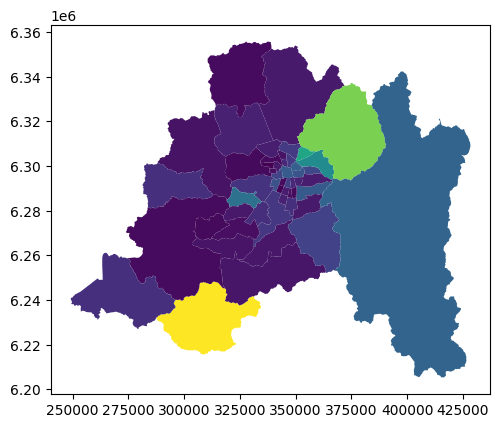

In [48]:
result_gdf = merged_gdf.dissolve(by='NOM_COM')
result_gdf.plot(column='Metrica')

In [54]:
import numpy as np

In [56]:
def custom_std(series):
    return np.std(series)

# Agrupa y disuelve el GeoDataFrame por una columna específica y calcula la desviación estándar
result = merged_gdf.dissolve(by='NOM_COM', aggfunc=custom_std)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1780: FutureWarning: ['NOM_REG', 'COD_PROV', 'NOM_PROV', 'COD_COM', 'NOM_DIS'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc, **kwargs)


<Axes: >

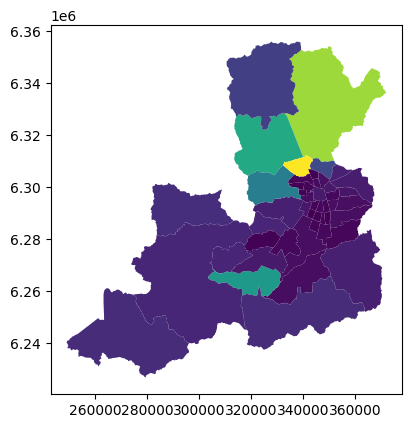

In [57]:
result.plot(column='Metrica')